# Loading waveforms.
## Authors: Vaishak Prasad

[comment]: <> (Abstract: TODO)

**Notebook Status:** <font color='green'><b> Production </b></font> 

**Notes:** 
Last checked on 14 May 2023

## Introduction:
This notebook describes the routines for 

1. Loading RIT waveform data (Strain $rh/M$ and $\Psi_4$) into mode arrays.
1. Loading GT waveform data (Strain $rh/M$ and $\Psi_4$) into mode arrays.
1. Loading SpEC waveform data (Strain $rh/M$ and $\Psi_4$) into mode arrays.
1. Loading SpECTRE CCE waveform data (Strain $rh/M$ and $\Psi_4$) into mode arrays.
1. Trasformations between harmonic and angular basis.

<a id='toc'></a>

# Table of Contents
$$\label{toc}$$

This notebook is organized as follows:

1. [Sec 1](#imports): Initialize the required Python libraries.
1. [Sec 2](#rit)  : Load RIT data. 
    1. [Sec 2.1](#rit_psi4) : Weyl scalar $\Psi_4$
    1. [Sec 2.2](#rit_strain) : Strain $rh/M$
1. [Sec 3](#gt) : Load GeorgiaTech (MAYA) Strain.
1. [Sec 4](#spec)  : Load SpEC data. 
    1. [Sec 4.1](#sxs_psi4) : Weyl scalar $\Psi_4$
    1. [Sec 4.2](#sxs_strain) : Strain $rh/M$
1. [Sec 5](#spectre)  : Load SpECTRE data. 
    1. [Sec 5.1](#spectre_psi4) : Weyl scalar $\Psi_4$
    1. [Sec 5.2](#sprectre_strain) : Strain $rh/M$
1. [Sec 6](#transforms) : Transformations to and from SWSH basis.

<a id='imports'></a>

# Sec 1: Initialize the required Python libraries and functions. [Back to [top](#toc)\]
$$\label{imports}$$

In [1]:
import numpy as np
import waveformtools
import matplotlib.pyplot as plt

#####################
# matplotlib presets
#########################################

labelsize = 16
labelpad = 14

plt.rcParams.update({"font.size": 12})
plt.rcParams.update({"figure.figsize": (8, 6)})
plt.rcParams.update({"axes.grid": True})
plt.rcParams.update({"axes.labelpad": labelpad})
plt.rcParams.update({"axes.labelsize": labelsize})
plt.rcParams.update({"figure.autolayout": True})
plt.rcParams.update({"grid.alpha": 0.3})
plt.rcParams.update({"grid.alpha": 0.3})
plt.rcParams.update({"legend.markerscale": 12})

/home/vaishakprasad/Documents/Codes/waveformtools/waveformtools


<a id='rit'></a>

## Sec 2: Loding of RIT waveform data \[Back to [top](#toc)\]



Here the $\Psi_4$ and strain $rh/M$ data from a simulation from the RIT catalogue is loaded info wavefoms modes_array.

$$\label{rit}$$

<a id='rit_psi4'></a>
## Sec 2.1: Load $\Psi_4$ data of all available modes.

In [3]:
from waveformtools import waveforms
from waveformtools.waveforms import modes_array

In [4]:
## Paths
from pathlib import Path

home = str(Path.home())
# This path contains all tShe
# psi4 data correcponding to the
# simulation.
psi4_data_dir = f"{home}/NR/ExtrapPsi4_RIT-BBH-0001-n100-id3"

In [5]:
# Name of the run
label = f"q1a0_a RIT_rPsi4inf"

# Create a modes array
wf_psi = modes_array(label=label, data_dir=psi4_data_dir)

wf_psi.load_modes(ftype="RIT", var_type="Psi4", centre=True)

# Specify the sampling step
# wf_psi.load_modes(ftype='RIT', var_type='Psi4', centre=True, resam_type=0.1)

# Specify the resampling method
# wf_psi.load_modes(ftype='RIT', var_type='Psi4', centre=True, resam_type=0.1, resam_kind='cubic')

# Uncomment the below line to save
# the modes array as waveformtools hdf file
# wf_psi.save_modes(out_file_name='RIT_{label}_mp_psi4_resam_inf_new.h5')

Passing /home/vaishakprasad/NR/ExtrapPsi4_RIT-BBH-0001-n100-id3/None
Loading RIT Psi4 type data.
All files found ['rPsi4_l3_m3_rInf.asc', 'rPsi4_l4_m-3_rInf.asc', 'rPsi4_l4_m4_rInf.asc', 'rPsi4_l3_m-2_rInf.asc', 'rPsi4_l3_m1_rInf.asc', 'rPsi4_l4_m-1_rInf.asc', 'rPsi4_l2_m2_rInf.asc', 'rPsi4_l4_m1_rInf.asc', 'rPsi4_l2_m1_rInf.asc', 'rPsi4_l2_m0_rInf.asc', 'rPsi4_l4_m2_rInf.asc', 'rPsi4_l3_m-3_rInf.asc', 'rPsi4_l4_m-4_rInf.asc', 'rPsi4_l3_m0_rInf.asc', 'rPsi4_l4_m3_rInf.asc', 'rPsi4_l3_m2_rInf.asc', 'rPsi4_l2_m-2_rInf.asc', 'rPsi4_l2_m-1_rInf.asc', 'rPsi4_l4_m0_rInf.asc', 'rPsi4_l3_m-1_rInf.asc', 'rPsi4_l4_m-2_rInf.asc']
The modes list is [[2, [-2, -1, 0, 1, 2]], [3, [-3, -2, -1, 0, 1, 2, 3]], [4, [-4, -3, -2, -1, 0, 1, 2, 3, 4]]]
Reading in modes...
Loading 2 -2
Creating modes data
Min dt 0.25 and Max dt 0.25
Resampling at the finest timestep 0.25
Loading 2 -1
Loading 2 0
Loading 2 1
Loading 2 2
Loading 3 -3
Loading 3 -2
Loading 3 -1
Loading 3 0
Loading 3 1
Loading 3 2
Loading 3 3
Loadi

1

In [6]:
wf_psi.get_metadata()

{'label': 'q1a0_a RIT_rPsi4inf',
 'data_dir': '/home/vaishakprasad/NR/ExtrapPsi4_RIT-BBH-0001-n100-id3',
 'file_name': None,
 'key_format': None,
 'ell_max': 4,
 'modes_list': [[2, [-2, -1, 0, 1, 2]],
  [3, [-3, -2, -1, 0, 1, 2, 3]],
  [4, [-4, -3, -2, -1, 0, 1, 2, 3, 4]]],
 'r_ext': inf,
 'frequency_axis': None,
 'out_file_name': None,
 'maxtime': None,
 'date': '2023-05-14',
 'time': '18:34:16',
 'key_ex': None,
 'spin_weight': -2,
 'actions': 'empty->load_modes->recenter',
 'centered': True}

## Plot a few modes

In [7]:
from waveformtools.compare import plot_modes

In [8]:
help(plot_modes)

Help on function plot_modes in module waveformtools.compare:

plot_modes(wf1, nmodes=3, save_fig=False, xlim=[-1200, 100], ylim='auto', nstop=1, plot22=False)
    Plot the first `nmodes` dominant modes of
    the input waveforms
    
    Parameters
    ----------
    wf:           modes_array
                              The list of `modes_array` waveforms
                              to plot.
    nmodes:     int
                            The number of modes to plot.
    xlim : list
           [xmin, xmax] limits to plot.
    tol:    float
                    The tolerance to detect the modes.
    
    Returns
    -------
    Plots.



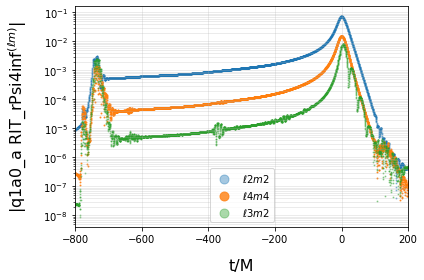

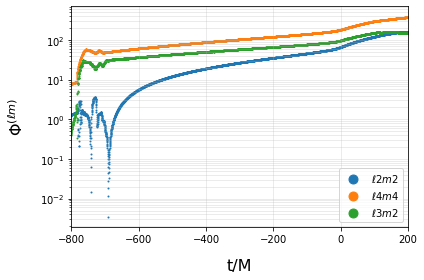

In [9]:
plot_modes(wf_psi, nmodes=3, xlim=[-800, 200])

<a id='rit_strain'></a>

## Sec 2.2: Load RIT Strain data $r h /M$ [Back to [top](#toc)]
$$\label{rit_strain}$$

Here the strain $r h/M$ data from a simulation from the RIT catalogue is loaded into a `modes_array`.

In [10]:
# Set path variables

strain_data_dir = f"{home}/NR"
strain_file_name = "ExtrapStrain_RIT-BBH-0001-n100.h5"

In [11]:
# Name of the run
label = "RIT q1a0_a strain"

# Create a modes array
wf_strain = modes_array(
    label=label, data_dir=strain_data_dir, file_name=strain_file_name
)

wf_strain.load_modes(ftype="RIT", var_type="Strain", centre=True)


# Uncomment the below line to save
# the modes array as waveformtools hdf file
# wf_psi.save_modes(out_file_name='RIT_{label}_mp_psi4_resam_inf_new.h5')

Passing /home/vaishakprasad/NR/ExtrapStrain_RIT-BBH-0001-n100.h5
Loading RIT strain data.
Interpolating using interp1d
Fetching all keys from H5 file
['NRTimes', 'amp_l2_m-1', 'amp_l2_m-2', 'amp_l2_m0', 'amp_l2_m1', 'amp_l2_m2', 'amp_l3_m-1', 'amp_l3_m-2', 'amp_l3_m-3', 'amp_l3_m0', 'amp_l3_m1', 'amp_l3_m2', 'amp_l3_m3', 'amp_l4_m-1', 'amp_l4_m-2', 'amp_l4_m-3', 'amp_l4_m-4', 'amp_l4_m0', 'amp_l4_m1', 'amp_l4_m2', 'amp_l4_m3', 'amp_l4_m4', 'auxiliary-info', 'phase_l2_m-1', 'phase_l2_m-2', 'phase_l2_m0', 'phase_l2_m1', 'phase_l2_m2', 'phase_l3_m-1', 'phase_l3_m-2', 'phase_l3_m-3', 'phase_l3_m0', 'phase_l3_m1', 'phase_l3_m2', 'phase_l3_m3', 'phase_l4_m-1', 'phase_l4_m-2', 'phase_l4_m-3', 'phase_l4_m-4', 'phase_l4_m0', 'phase_l4_m1', 'phase_l4_m2', 'phase_l4_m3', 'phase_l4_m4']
All files found ['amp_l2_m-1', 'amp_l2_m-2', 'amp_l2_m0', 'amp_l2_m1', 'amp_l2_m2', 'amp_l3_m-1', 'amp_l3_m-2', 'amp_l3_m-3', 'amp_l3_m0', 'amp_l3_m1', 'amp_l3_m2', 'amp_l3_m3', 'amp_l4_m-1', 'amp_l4_m-2', 'amp_l4_

/home/vaishakprasad/Documents/Codes/waveformtools/waveformtools/dataIO.py:675: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  dt_auto = mode(np.diff(time_axis))[0][0]


Reading in modes...
Loading 2 -2
Creating modes data
Default dt is 0.25
Loading 2 -1
Loading 2 0
Loading 2 1
Loading 2 2
Loading 3 -3
Loading 3 -2
Loading 3 -1
Loading 3 0
Loading 3 1
Loading 3 2
Loading 3 3
Loading 4 -4
Loading 4 -3
Loading 4 -2
Loading 4 -1
Loading 4 0
Loading 4 1
Loading 4 2
Loading 4 3
Loading 4 4


1

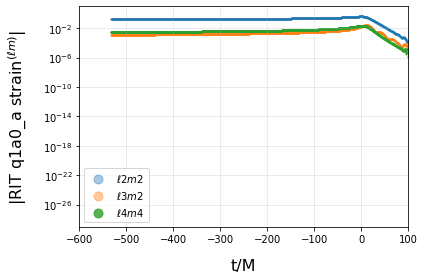

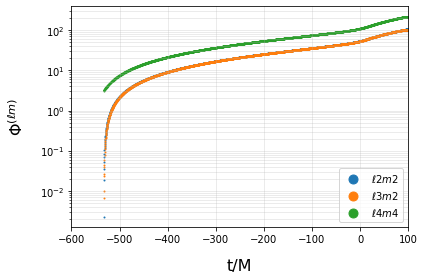

In [12]:
plot_modes(wf_strain, nmodes=3, xlim=[-600, 100])

<a id='gt'></a>

## Sec 3: Loding of GT waveform data \[Back to [top](#toc)\]



Here the strain $rh/M$ data from a simulation from the GT catalogue is loaded info wavefoms modes_array.

$$\label{gt}$$

In [13]:
# Set path variables

strain_data_dir = f"{home}/.cache/MAYA/data"
strain_file_name = "GT0001.h5"

In [14]:
# Name of the simulation
label = "gt strain"

# Create a modes array
wf_strain_gt = modes_array(
    label=label, data_dir=strain_data_dir, file_name=strain_file_name
)

wf_strain_gt.load_modes(ftype="GT", var_type="Strain", centre=True)


# Uncomment the below line to save
# the modes array as waveformtools hdf file
# wf_psi.save_modes(out_file_name='RIT_{label}_mp_psi4_resam_inf_new.h5')

Passing /home/vaishakprasad/.cache/MAYA/data/GT0001.h5
Loading RIT strain data.
Interpolating using interp1d
Fetching all keys from H5 file
['amp_l2_m-1', 'amp_l2_m-2', 'amp_l2_m0', 'amp_l2_m1', 'amp_l2_m2', 'amp_l3_m-1', 'amp_l3_m-2', 'amp_l3_m-3', 'amp_l3_m0', 'amp_l3_m1', 'amp_l3_m2', 'amp_l3_m3', 'amp_l4_m-1', 'amp_l4_m-2', 'amp_l4_m-3', 'amp_l4_m-4', 'amp_l4_m0', 'amp_l4_m1', 'amp_l4_m2', 'amp_l4_m3', 'amp_l4_m4', 'amp_l5_m-1', 'amp_l5_m-2', 'amp_l5_m-3', 'amp_l5_m-4', 'amp_l5_m-5', 'amp_l5_m0', 'amp_l5_m1', 'amp_l5_m2', 'amp_l5_m3', 'amp_l5_m4', 'amp_l5_m5', 'amp_l6_m-1', 'amp_l6_m-2', 'amp_l6_m-3', 'amp_l6_m-4', 'amp_l6_m-5', 'amp_l6_m-6', 'amp_l6_m0', 'amp_l6_m1', 'amp_l6_m2', 'amp_l6_m3', 'amp_l6_m4', 'amp_l6_m5', 'amp_l6_m6', 'auxiliary-info', 'phase_l2_m-1', 'phase_l2_m-2', 'phase_l2_m0', 'phase_l2_m1', 'phase_l2_m2', 'phase_l3_m-1', 'phase_l3_m-2', 'phase_l3_m-3', 'phase_l3_m0', 'phase_l3_m1', 'phase_l3_m2', 'phase_l3_m3', 'phase_l4_m-1', 'phase_l4_m-2', 'phase_l4_m-3', 'ph

/home/vaishakprasad/Documents/Codes/waveformtools/waveformtools/dataIO.py:709: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  dt_auto = mode(np.diff(time_axis))[0][0]


Loading 2 0
Loading 2 1
Loading 2 2
Loading 3 -3
Loading 3 -2
Loading 3 -1
Loading 3 0
Loading 3 1
Loading 3 2
Loading 3 3
Loading 4 -4
Loading 4 -3
Loading 4 -2
Loading 4 -1
Loading 4 0
Loading 4 1
Loading 4 2
Loading 4 3
Loading 4 4
Loading 5 -5
Loading 5 -4
Loading 5 -3
Loading 5 -2
Loading 5 -1
Loading 5 0
Loading 5 1
Loading 5 2
Loading 5 3
Loading 5 4
Loading 5 5
Loading 6 -6
Loading 6 -5
Loading 6 -4
Loading 6 -3
Loading 6 -2
Loading 6 -1
Loading 6 0
Loading 6 1
Loading 6 2
Loading 6 3
Loading 6 4
Loading 6 5
Loading 6 6


1

In [15]:
wf_strain_gt.get_metadata()

{'label': 'gt strain',
 'data_dir': '/home/vaishakprasad/.cache/MAYA/data',
 'file_name': 'GT0001.h5',
 'key_format': None,
 'ell_max': 6,
 'modes_list': [[2, [-2, -1, 0, 1, 2]],
  [3, [-3, -2, -1, 0, 1, 2, 3]],
  [4, [-4, -3, -2, -1, 0, 1, 2, 3, 4]],
  [5, [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]],
  [6, [-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6]]],
 'r_ext': inf,
 'frequency_axis': None,
 'out_file_name': None,
 'maxtime': None,
 'date': '2023-05-14',
 'time': '18:34:33',
 'key_ex': None,
 'spin_weight': -2,
 'actions': 'empty->load_modes->center'}

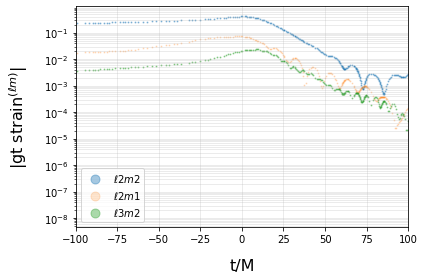

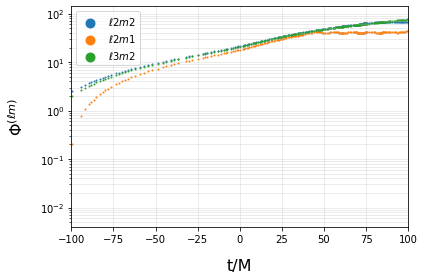

In [17]:
plot_modes(wf_strain_gt, nmodes=3, xlim=[-100, 100])

<a id='spec'></a>

## Sec 4: Loding of SpEC waveform data \[Back to [top](#toc)\]



Here the $\Psi_4$ and strain $rh/M$ data from a simulation from the SXS catalogue is loaded info wavefoms modes_array.

$$\label{spec}$$

<a id='sxs_psi4'></a>

## Sec 4.1: Load SXS Psi4 data $\Psi_4$ [Back to [top](#toc)]
$$\label{sxs_psi4}$$

Here the $\Psi_4$ data from a simulation from the sxs catalogue is loaded into a `modes_array`.

In [18]:
# Set path variables

psi4_data_dir = f"{home}/NR/"
psi4_file_name = "rMPsi4_Asymptotic_GeometricUnits_CoM.h5"

In [19]:
# Name of the simulation
label = "SXS:BBH:0001 Psi4"

# Create a modes array
wf_psi4_sxs = modes_array(
    label=label, data_dir=psi4_data_dir, file_name=psi4_file_name
)

wf_psi4_sxs.load_modes(ftype="SpEC", var_type="Psi4", centre=True)


# Uncomment the below line to save
# the modes array as waveformtools hdf file
# wf_psi.save_modes(out_file_name='RIT_{label}_mp_psi4_resam_inf_new.h5')

Passing /home/vaishakprasad/NR//rMPsi4_Asymptotic_GeometricUnits_CoM.h5
Loading SpEC data.
ell_max not provided.
modes array not provided. Setting ell_max from file...
Chosen ell max 8 Available ell_max 8
Using extrap order 4
Constructing the modes list
Creating modes data
Min dt 0.05718379830432241 and Max dt 0.5000603551985208
Resampling at the finest timestep 0.05718379830432241
Chosen resampling fineness: finest


/home/vaishakprasad/Documents/Codes/waveformtools/waveformtools/dataIO.py:1251: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  dt_auto = mode(np.diff(time_axis))[0][0]


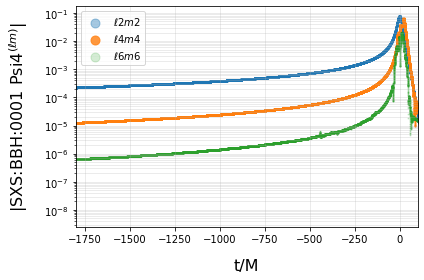

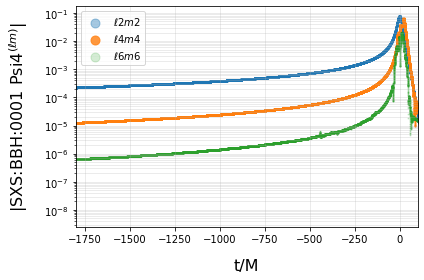

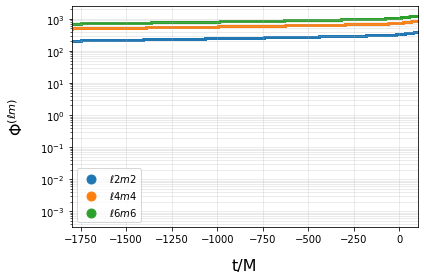

In [21]:
plot_modes(wf_psi4_sxs, nmodes=3, xlim=[-1800, 100])

<a id='sxs_strain'></a>

## Sec 4.2: Load SXS Strain data $r h /M$ [Back to [top](#toc)]
$$\label{sxs_strain}$$

Here the strain $r h/M$ data from a simulation from the sxs catalogue is loaded into a `modes_array`.

In [ ]:
# Set path variables

strain_data_dir = f"{home}/.cache/sxs/SXS:BBH:0001v3/Lev5/"
strain_file_name = "rhOverM_Asymptotic_GeometricUnits_CoM.h5"

In [23]:
# Name of the simulation
label = "SXS:BBH:0001 strain"

# Create a modes array
wf_strain_sxs = modes_array(
    label=label, data_dir=strain_data_dir, file_name=strain_file_name
)

wf_strain_sxs.load_modes(ftype="SpEC", var_type="Strain", centre=True)


# Uncomment the below line to save
# the modes array as waveformtools hdf file
# wf_psi.save_modes(out_file_name='RIT_{label}_mp_psi4_resam_inf_new.h5')

Passing /home/vaishakprasad/.cache/sxs/SXS:BBH:0001v3/Lev5//rhOverM_Asymptotic_GeometricUnits_CoM.h5
Loading SpEC data.
ell_max not provided.
modes array not provided. Setting ell_max from file...
Chosen ell max 8 Available ell_max 8
Using extrap order 4
Constructing the modes list
Creating modes data
Min dt 0.05718379830432241 and Max dt 0.5000603551985208
Resampling at the finest timestep 0.05718379830432241
Chosen resampling fineness: finest


In [24]:
wf_strain_sxs.get_metadata()

{'label': 'SXS:BBH:0001 strain',
 'data_dir': '/home/vaishakprasad/.cache/sxs/SXS:BBH:0001v3/Lev5/',
 'file_name': 'rhOverM_Asymptotic_GeometricUnits_CoM.h5',
 'key_format': None,
 'ell_max': 8,
 'modes_list': [[2, [-2, -1, 0, 1, 2]],
  [3, [-3, -2, -1, 0, 1, 2, 3]],
  [4, [-4, -3, -2, -1, 0, 1, 2, 3, 4]],
  [5, [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]],
  [6, [-6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6]],
  [7, [-7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7]],
  [8, [-8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]]],
 'r_ext': inf,
 'frequency_axis': None,
 'out_file_name': None,
 'maxtime': None,
 'date': '2023-05-14',
 'time': '18:37:38',
 'key_ex': None,
 'spin_weight': -2,
 'actions': 'empty',
 'extrap_order': 4}

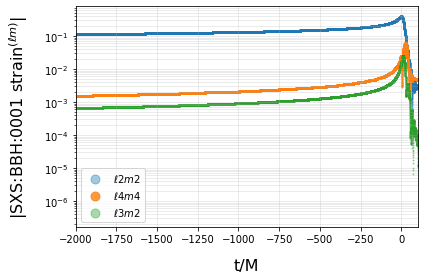

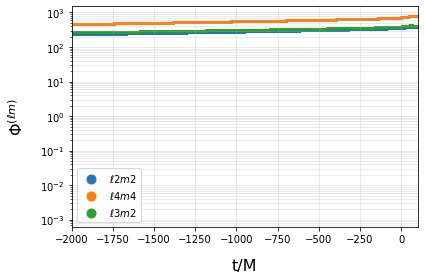

In [26]:
plot_modes(wf_strain_sxs, nmodes=3, xlim=[-2000, 100])

<a id='spectre'></a>

## Sec 5: Loding of SpECTRE waveform data \[Back to [top](#toc)\]



Here the $\Psi_4$ and strain $rh/M$ data from a simulation from the SpECTRE CCE catalogue is loaded info wavefoms modes_array.

$$\label{spectre}$$

<a id='spectre_psi4'></a>

## Sec 5.1: Load SpECTRE Psi4 data $\Psi_4$ [Back to [top](#toc)]
$$\label{spectre_psi4}$$

Here the $\Psi_4$ data from a simulation from the SpECTRE catalogue is loaded into a `modes_array`.

In [55]:
from importlib import reload

reload(waveformtools)
reload(waveformtools.waveforms)
reload(waveformtools.dataIO)
from waveformtools.waveforms import modes_array

/home/vaishakprasad/Documents/Codes/waveformtools/waveformtools


In [56]:
# Set path variables

psi4_data_dir = f"{home}/NR/"
psi4_file_name = "rMPsi4_Extrapolated_N7_CoM.h5"

In [ ]:
# Name of the simulation
label = "SpECTRE Psi4 CCE extrap"

# Create a modes array
wf_psi4_sp = modes_array(
    label=label, data_dir=psi4_data_dir, file_name=psi4_file_name
)

wf_psi4_sp.load_modes(
    ftype="SpECTRE", var_type="Psi4", centre=True, resam_type="auto"
)


# Uncomment the below line to save
# the modes array as waveformtools hdf file
# wf_psi.save_modes(out_file_name='RIT_{label}_mp_psi4_resam_inf_new.h5')

Passing /home/vaishakprasad/NR//rMPsi4_Extrapolated_N7_CoM.h5
Loading SpECTRE data.
Constructing the modes list
Creating modes data
Min dt 0.011307906874208129 and Max dt 1.0751766069618682
Resampling at the default timestep 0.1000003335693691
resam_type auto


In [ ]:
plot_modes(wf_psi4_sp, nmodes=3, xlim=[-2000, 100])

<a id='spectre_strain'></a>

## Sec 5.2: Load SpECTRE Strain data $r h /M$ [Back to [top](#toc)]
$$\label{spectre_strain}$$

Here the strain $r h/M$ data from a simulation from the SpECTRE CCE catalogue is loaded into a `modes_array`.

In [ ]:
# Set path variables

strain_data_dir = f"{home}/NR/"
strain_file_name = "rhOverM_Extrapolated_N5_CoM_Mem.h5"

In [ ]:
# Name of the simulation
label = "SpECTRE CCE strain extrap"

# Create a modes array
wf_strain_sp = modes_array(
    label=label, data_dir=strain_data_dir, file_name=strain_file_name
)

wf_strain_sp.load_modes(ftype="SpECTRE", var_type="Strain", centre=True)


# Uncomment the below line to save
# the modes array as waveformtools hdf file
# wf_psi.save_modes(out_file_name='RIT_{label}_mp_psi4_resam_inf_new.h5')

In [ ]:
plot_modes(wf_strain_sp, nmodes=3, xlim=[-2000, 100])

<a id='transforms'></a>

# Sec 6: Transformations to harmonic and angular basis [Back to [top](#toc)]
$$\label{transforms}$$

Here the transformation of the Weyl scalar $\Psi_4$ data from Spin-Weighted Spherical Harmonic (SWSH, $\ell, m$) basis to coordinate ($\theta, \phi$) basis is demonstrated.

In [ ]:
# Create a staggered grid on a sphere.
from waveformtools import grids

# This creates a uniform angular grid stagerred about the north pole.
# By default, 4 ghost zones (2 on either sides)
# is alloted in each direction.
grid_info = grids.spherical_grid(ntheta=125, nphi=244)

theta, phi = grid_info.meshgrid

In [ ]:
%%time
# Transform to angular coordinates.
waveform_sp = wf2.to_spherical_array(grid_info=grid_info)

<a id='trans1'></a>
## Carry out the transformation.

In [ ]:
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)


%matplotlib widget
import matplotlib
from mpl_toolkits.mplot3d import axes3d, Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

ax = Axes3D(fig)

# Plot the imaginary part of Psi4
# at timestep
tstep = 100

U = waveform_sp.data[:, :, tstep].imag

# Assign color dimension
color_dimension = U  # change to desired fourth dimension

minn, maxx = color_dimension.min(), color_dimension.max()
norm = matplotlib.colors.Normalize(minn, maxx)

m = plt.cm.ScalarMappable(norm=norm, cmap="jet")
m.set_array([])

fcolors = m.to_rgba(color_dimension)

# Plot the surface.
surf = ax.plot_surface(
    x, y, z, linewidth=0, antialiased=False, facecolors=fcolors
)
plt.show()

<a id='trans2'></a>
## Reverse transformation.

In [ ]:
%%time
wf2_2 = waveform_sp.to_modes_array()

In [ ]:
ell = 2
emm = -2
delta = wf2.mode(ell, emm) - wf2_2.mode(ell, emm)

fig, ax = plt.subplots()

ax.plot(wf2.time_axis, wf2.mode(2, 2), label="original", alpha=0.9, c="brown")
ax.plot(
    wf2.time_axis, wf2_2.mode(2, 2), label="recon", linestyle="--", c="blue"
)
ax.set_title("Reconstructed vs original waveforms")
plt.legend()
plt.show()


fig, ax = plt.subplots()
ax.set_yscale("log")
ax.set_title("Error in transformation")
ax.scatter(wf2.time_axis, abs(delta), s=1)
plt.show()